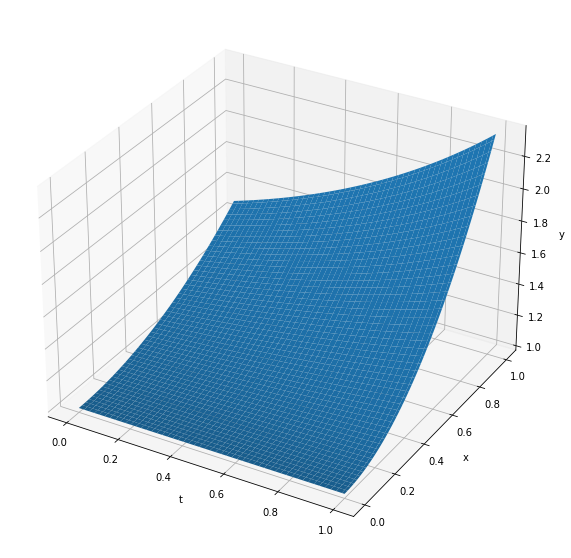

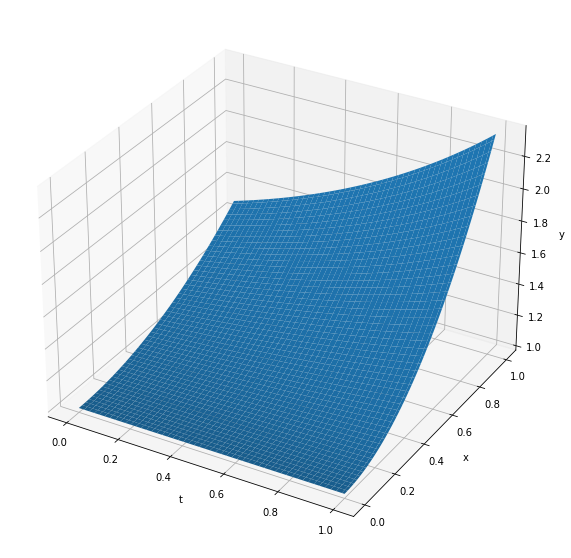

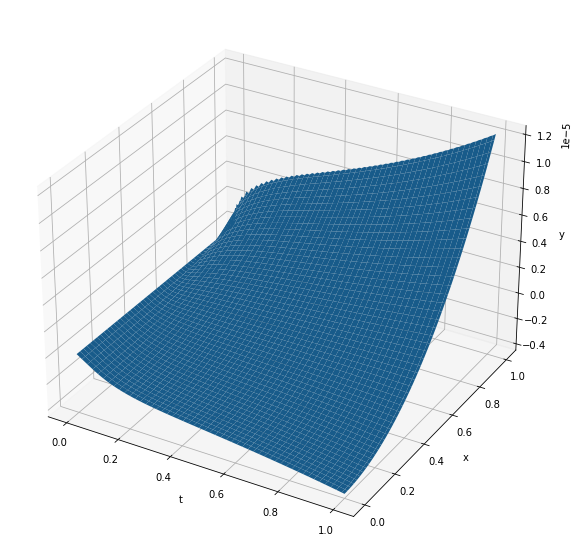

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
 

N = 100
M = 100
h = 1/(N-1)
tau = 1/(M-1)
e = 2.7182818284
 
x = np.linspace(0, 1, N)
t = np.linspace(0, 1, M)
y = np.zeros((N, M))
 
y[:, 0] = 1 + x**2/2
 

alpha = np.zeros(N-1)
bet = np.zeros(N-1)
 
A = 1/(2*h**2)
B = A
C = 2*A+1/tau
 
for j in range(M-1):
    alpha[0] = 1/(1+h**2/tau)
    bet[0] = alpha[0]*(y[1, j]-y[0, j] + h**2/tau*y[0, j]-h**2*e**(t[j]+0.5*tau))
 
    for i in range(1, N-1):
        F = (y[i, j]/tau+(y[i-1, j]-2*y[i, j]+y[i+1, j])/(2*h**2)+e**(t[j]+0.5*tau)*(x[i]**2/2-1))
        alpha[i] = B/(C-A*alpha[i-1])
        bet[i] = (A*bet[i-1]+F)/(C-A*alpha[i-1])
 
    kappa_2 = 1/(1+h**2/tau)
    mu_2 = kappa_2*(-(y[N-1, j]-y[N-2, j])+2*h*e**(t[j]+0.5*tau)+h**2/tau*y[N-1, j]-h**2/2*e**(t[j]+0.5*tau))
    y[N-1, j+1] = (mu_2+kappa_2*bet[N-2])/(1-kappa_2*alpha[N-2])
    for i in reversed(range(N-1)):
        y[i, j+1] = alpha[i]*y[i+1, j+1] + bet[i]
        
        
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('y')
t, x = np.meshgrid(t, x)
surf = ax.plot_surface(t, x, y)

def f(y,x):
    return 1 + x**2*e**y/2

fig = plt.figure(figsize = (10, 10))
ax_1 = fig.add_subplot(1, 1, 1, projection = '3d')
ax_1.set_xlabel('t')
ax_1.set_ylabel('x')
ax_1.set_zlabel('y')
t = np.linspace(0,1,M)
x = np.linspace(0,1,N)
t, x = np.meshgrid(t, x)
w = f(t,x)
surf_1 = ax_1.plot_surface(t, x, w)


fig = plt.figure(figsize = (10, 10))
ax_2 = fig.add_subplot(1, 1, 1, projection = '3d')
ax_2.set_xlabel('t')
ax_2.set_ylabel('x')
ax_2.set_zlabel('y')
t = np.linspace(0,1,M)
x = np.linspace(0,1,N)
t, x = np.meshgrid(t, x)
surf_2 = ax_2.plot_surface(t, x, w - y)